In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Above we imported pandas and numpy as we know we will need them early on. 'os' import is so we can open the csv we have saved on our machine. Below we import the train set and display the first few rows. Note that we must include the 'r' before our file path to avoid an error

In [2]:
titanic_df = pd.read_csv(r'C:\users\efrut\OneDrive\Desktop\Coding practice\Titanic DataSet\train.csv')
# data = titanic_df
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Step 1: Let's learn a bit about or data set

In [3]:
print('The size of our df is: ', titanic_df.shape)
titanic_df.describe()

The size of our df is:  (891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df.describe(include=['O']) #look at object variables

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",male,CA. 2343,G6,S
freq,1,577,7,4,644


What do we see here? <br>
Well, most passeners were male (577/891)<br>
There were 3 places passengers embarked from, and the most common was S (644/889)<br>
Name, Ticket Number, and Cabin probably won't be of much use since so many are unique and they mostly identify passengers

Text(0,0.5,'count')

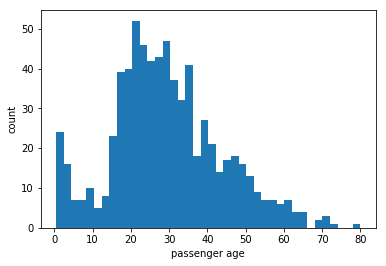

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(titanic_df["Age"].dropna(), bins=40) #we will break the data up into 40 groups
plt.xlabel("passenger age")
plt.ylabel("count")

Text(0,0.5,'count')

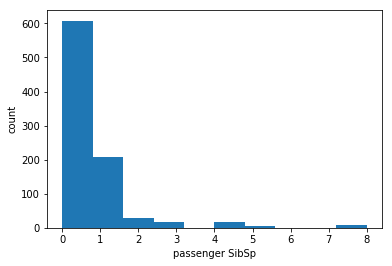

In [6]:
plt.hist(titanic_df["SibSp"].dropna()) 
plt.xlabel("passenger SibSp")
plt.ylabel("count")

Text(0,0.5,'count')

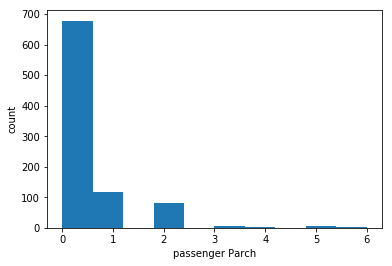

In [7]:
plt.hist(titanic_df["Parch"].dropna()) 
plt.xlabel("passenger Parch")
plt.ylabel("count")

Text(0,0.5,'count')

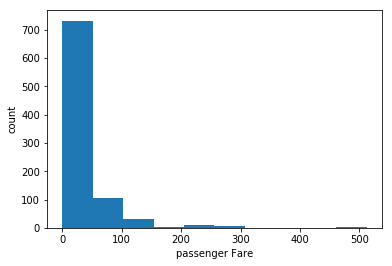

In [8]:
plt.hist(titanic_df["Fare"].dropna())
plt.xlabel("passenger Fare")
plt.ylabel("count")

These 4 charts make the data much easier to look at. We can see the following<br>
<ol><li>Most passengers are around 20-30 years old</li>
<li>The vast majority of passengers travelled with 0 or 1 siblings/spouses</li>
<li>The vast majority of passengers tarvelled with 0 parents/children with a few having 1 or 2</li>
<li>The passenger fare is heavily skewed with most paying less than 50 dollars </li>
</ol>

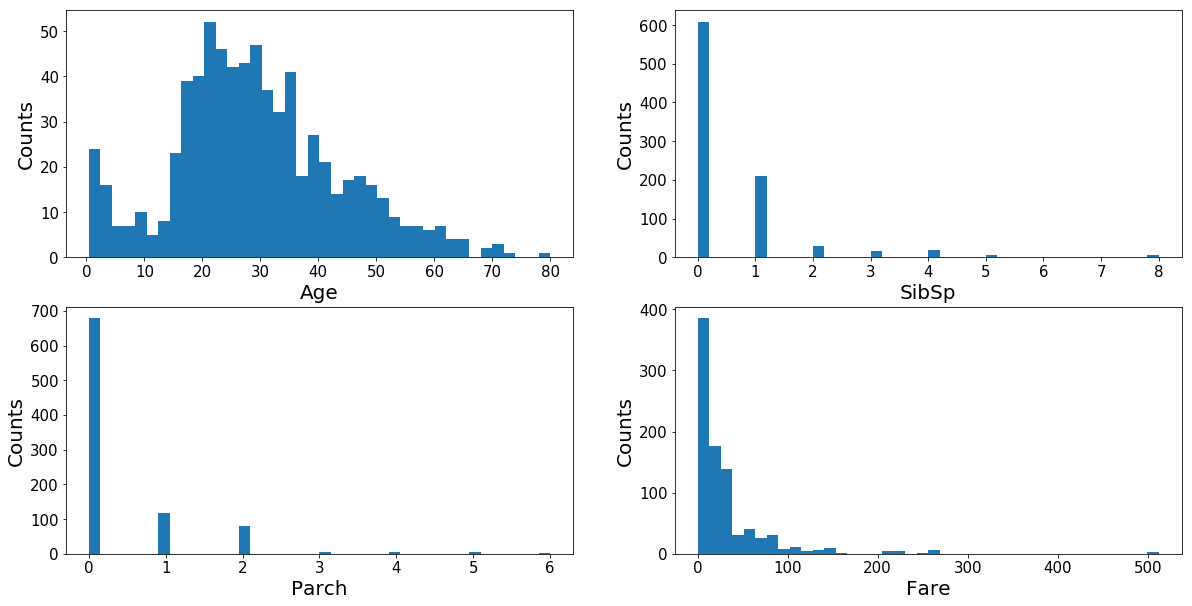

In [9]:
%matplotlib inline
# Having 4 charts in one column is a bit hard to read. We can instead put them together like this

plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(titanic_df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

Much nicer!!

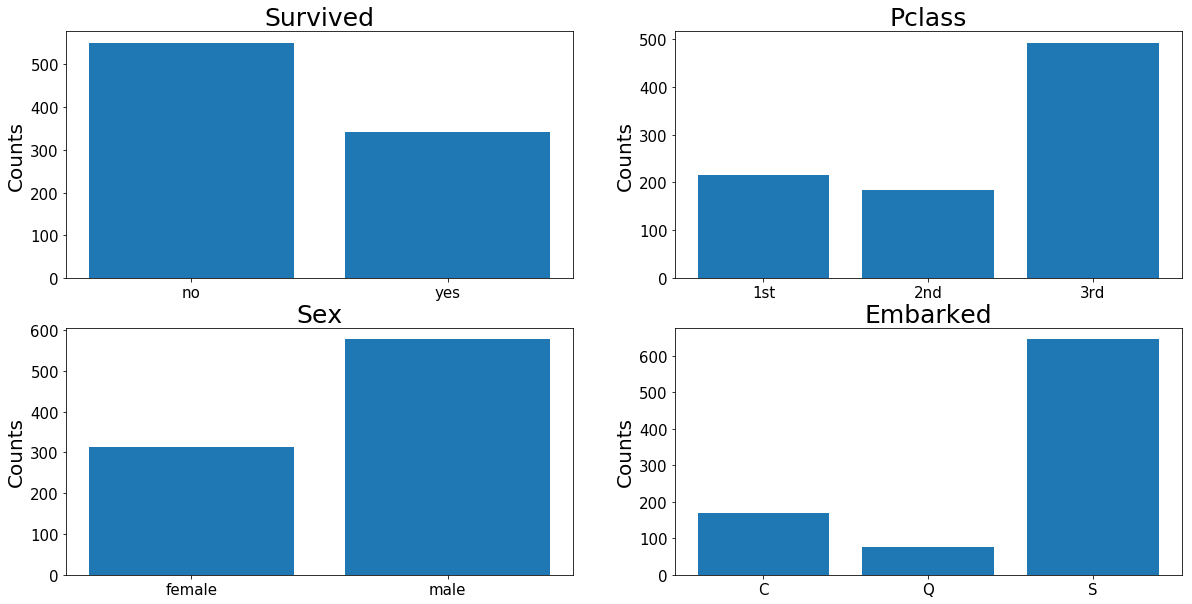

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make dataframes for our graph
X_surv = titanic_df.replace({'Survived':{1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_surv = titanic_df.replace({'Survived':{1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_surv, Y_surv)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

#make dataframes for our graph
X_class = titanic_df.replace({'Pclass':{1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_class = titanic_df.replace({'Pclass':{1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# make plot
axes[0, 1].bar(X_class, Y_class)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# data
X_sex = titanic_df.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_sex = titanic_df.groupby('Sex').size().reset_index(name='Counts')['Counts']

#make plot
axes[1, 0].bar(X_sex, Y_sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize = 20)
axes[1, 0].tick_params(axis='both', labelsize=15)

#data
X_embarked = titanic_df.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_embarked = titanic_df.groupby('Embarked').size().reset_index(name='Counts')['Counts']

#make plot
axes[1, 1].bar(X_embarked, Y_embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

What can we see from this? Well
<ol>
    <li>Most did not survive</li>
    <li>Majority of passengers were 3rd class</li>
    <li>Most passengers were male</li>
    <li>Most passengers departed from location S</li>
</ol>
Let's take a look at the correlations between our variables

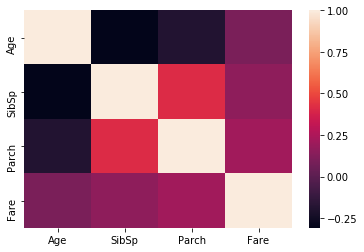

In [11]:
%matplotlib inline
import seaborn as sns # let's import seaborn here

correlations = titanic_df[num_features].corr() # num_features was used above and is a list of numerical columns
sns.heatmap(correlations, xticklabels=correlations.columns, yticklabels=correlations.columns, annot=False)

There dont seem to be any noteworthy correlations between our variables. The most significant one is between Parch and SibSp and is not very strong. Perhaps it represents that families travelling together would have spouses and child/parent relationships.

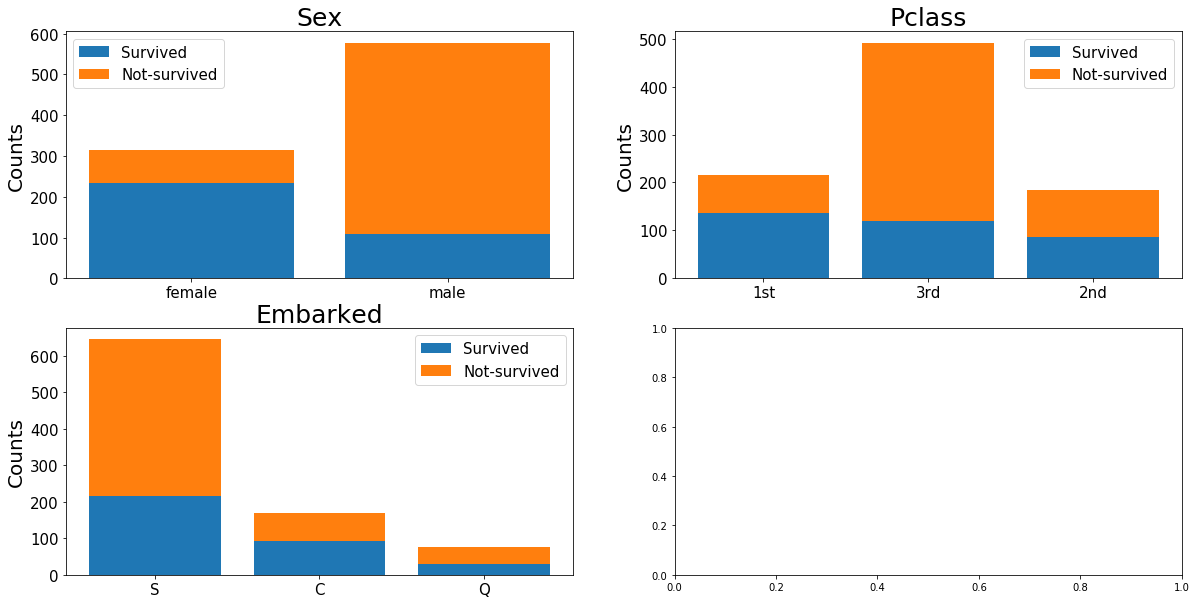

In [12]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# get survive vs not survive by gender data ready
sex_survive = titanic_df.replace({'Survived':{1: 'Survived', 0: 'Not Survived'}})[titanic_df['Survived']==1]['Sex'].value_counts()
sex_not_survive = titanic_df.replace({'Survived':{1: 'Survived', 0: 'Not Survived'}})[titanic_df['Survived']==0]['Sex'].value_counts()
# reindex figure out why we do this
sex_not_survive = sex_not_survive.reindex(index = sex_survive.index)
# make our bar graph
p1 = axes[0, 0].bar(sex_survive.index, sex_survive.values)
p2 = axes[0, 0].bar(sex_not_survive.index, sex_not_survive.values, bottom=sex_survive.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# get survive vs not survive by pclass data ready
pclass_survive = titanic_df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass':{1: '1st', 2: '2nd', 3: '3rd'}})[titanic_df['Survived']==1]['Pclass'].value_counts()
pclass_not_survive = titanic_df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass':{1: '1st', 2: '2nd', 3: '3rd'}})[titanic_df['Survived']==0]['Pclass'].value_counts()
pclass_not_survive = pclass_not_survive.reindex(index = pclass_survive.index)
#make our bar graph
p3 = axes[0, 1].bar(pclass_survive.index, pclass_survive.values)
p4 = axes[0, 1].bar(pclass_not_survive.index, pclass_not_survive.values, bottom=pclass_survive.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# get survive vs not survive by embarked data ready
embarked_survive = titanic_df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic_df['Survived']==1]['Embarked'].value_counts()
embarked_not_survive = titanic_df.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic_df['Survived']==0]['Embarked'].value_counts()
embarked_not_survive = embarked_not_survive.reindex(index = embarked_survive.index)
# make our bar graph
p5 = axes[1, 0].bar(embarked_survive.index, embarked_survive.values)
p6 = axes[1, 0].bar(embarked_not_survive.index, embarked_not_survive.values, bottom=embarked_survive.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)



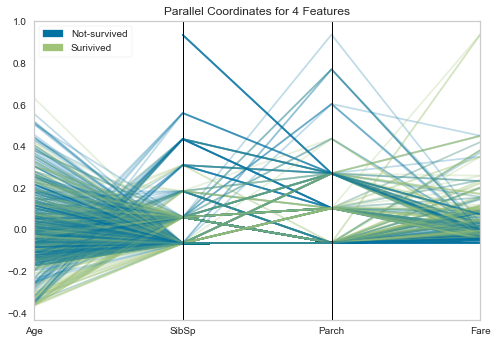

In [13]:
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
# from yellowbrick.style import set_palette
# set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Surivived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

#copy data for normalization
titanic_normalized = titanic_df.copy()

# normalize data to 0-1 range
for feature in num_features:
    titanic_normalized[feature] = (titanic_normalized[feature] - titanic_normalized[feature].mean(skipna=True)) / (titanic_normalized[feature].max(skipna=True) - titanic_normalized[feature].min(skipna=True))
    

# Extract the numpy arrays from the data frame
x = titanic_normalized[num_features].values
y = titanic_df.Survived.values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(x, y)      # Fit the data to the visualizer
visualizer.transform(x)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

From here we will do some data prep to eliminate missing values and get rid of columns we won't be using in our analysis of this set

In [14]:
# fill the missing age data with median value
def fill_na_median(titanic_df, inplace=True):
    return titanic_df.fillna(titanic_df.median(), inplace=inplace)

fill_na_median(titanic_df['Age'])

# check the result
titanic_df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return titanic_df.fillna('S', inplace=inplace)

fill_na_most(titanic_df['Embarked'])

# check the result
titanic_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

Now we will address the large skew that exists in the fare column

In [16]:
# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

titanic_df['Fare_log1p'] = log_transformation(titanic_df['Fare'])

# check the data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


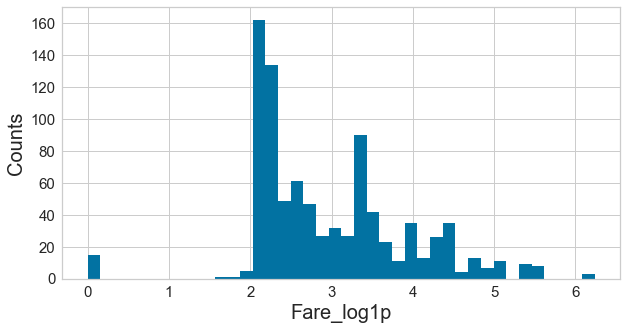

In [17]:
# check the distribution using histogram
# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(titanic_df['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

We can see that the skew is much better now

In [18]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [19]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log1p
0,0,3,male,22.0,1,0,7.2500,S,2.110213
1,1,1,female,38.0,1,0,71.2833,C,4.280593
2,1,3,female,26.0,0,0,7.9250,S,2.188856
3,1,1,female,35.0,1,0,53.1000,S,3.990834
4,0,3,male,35.0,0,0,8.0500,S,2.202765


Now the columns that we won't be using for predictions are gone and our data is much simpler

In [20]:
# get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = titanic_df[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


Now we have a separate dataframe with our dummy variables

In [21]:
# combine the numberical df and the dummy variable df
# create a dataset for the with the features we will use to predict
features = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
titanic_model_df = pd.concat([titanic_df[features], data_cat_dummies], axis=1)

# create a dataset for the targets, in this case, survived vs not survived
titanic_model_targets = titanic_df.replace({'Survived': {1: 'Survived', 0: 'Not_Survived'}})['Survived']

In [22]:
from sklearn.model_selection import train_test_split
# here we split our data into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(titanic_model_df, titanic_model_targets, test_size=0.3, random_state = 11)

# checking our results
print('Number of values in training set ', X_train.shape[0])
print('Number of values in validation set ', X_val.shape[0])

print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())
print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())

Number of values in training set  623
Number of values in validation set  268


No. of survived and not-survived in the training set:
Not_Survived    373
Survived        250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
Not_Survived    176
Survived         92
Name: Survived, dtype: int64


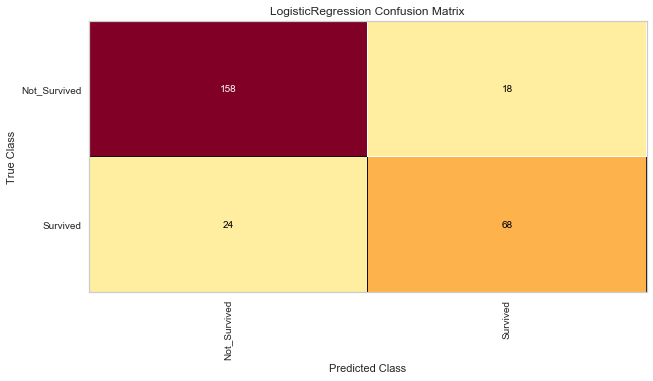

In [23]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# create a logistic regression object
log_reg = LogisticRegression()

# make our confusion matrix
classes = ['Not_Survived', 'Survived']
conf_matrix = ConfusionMatrix(log_reg, classes=classes, percent=False)

# fit the model
conf_matrix.fit(X_train, y_train)

conf_matrix.score(X_val, y_val)

conf_matrix.poof()

Reading our confusion matrix<br>
We read the matrix as follows: for the top left box, we predicted not_survived and the actual result was not_survived. For the bottom right, we prediced survived and the actual result was survived. The other diagonal is the cases we got wrong. We can make the calculation (158 + 68) / (158 + 68 + 18 + 24) = 84.33% to say that we accurately predicted 84.33% of the cases.

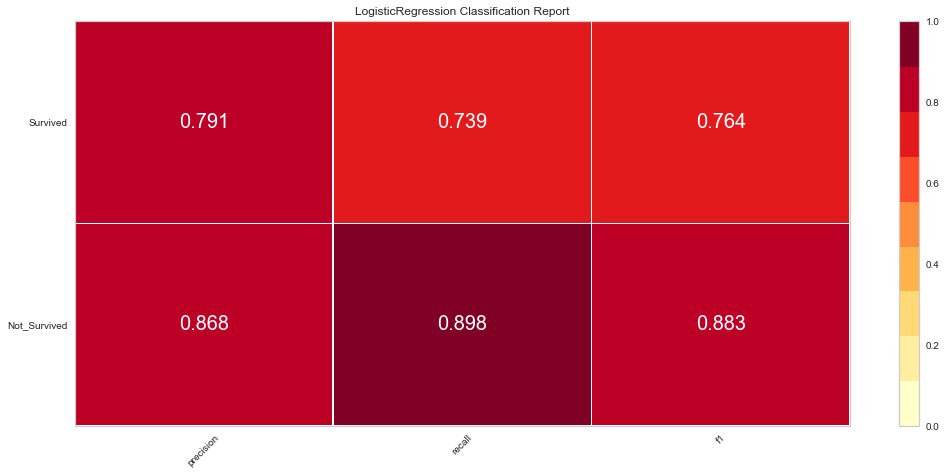

In [25]:
# we will now make a classification report

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

visualizer = ClassificationReport(log_reg, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.poof()

Interpreting our classification report<br>
There are three metrics listed on the report: precision, recall, and f1<br><br>
Precision: metric that compares the number of accurate predictions for an outcome with the total number of predictions for that outcome.<br><br>
Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label?<br><br>
F1 Score: The weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

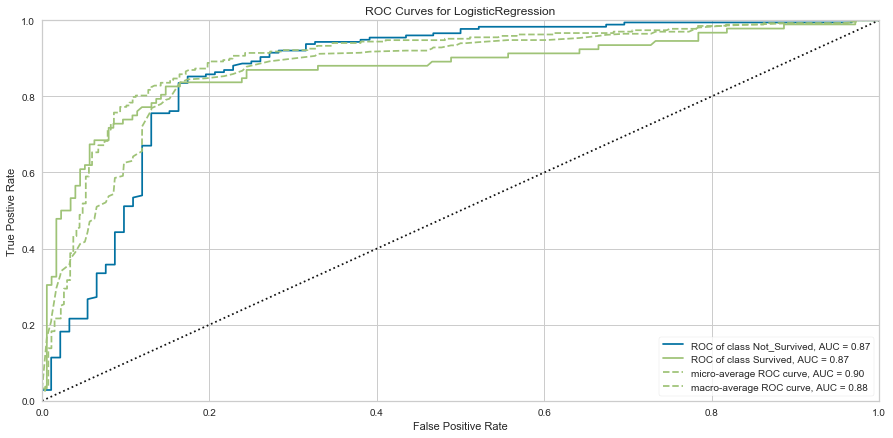

In [26]:
# We now create ROC curves for our model
visualizer = ROCAUC(log_reg)

visualizer.fit(X_train, y_train)

visualizer.score(X_val, y_val)

visualizer.poof()